#### Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.
#### Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [5]:
df = df.drop(['ORDERNUMBER', 'ORDERDATE', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1)
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Spain,Small
2819,29,100.00,1,3978.51,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Finland,Medium
2820,43,100.00,4,5417.57,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Spain,Medium
2821,34,62.24,1,2116.16,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,France,Small


In [6]:
for col in df.columns.values:
    print(df[col].value_counts())

34    112
21    103
46    101
27    100
41     97
31     97
45     97
26     96
25     94
29     94
48     94
20     93
22     92
33     92
24     91
32     91
38     91
49     91
36     89
44     89
37     87
43     85
39     84
28     82
40     78
42     76
30     75
23     73
35     71
47     70
50     65
55     16
66      5
51      4
15      4
19      3
76      3
64      3
60      3
56      3
18      3
59      3
61      3
6       2
70      2
11      2
10      2
54      2
13      1
62      1
58      1
52      1
16      1
12      1
65      1
77      1
85      1
97      1
Name: QUANTITYORDERED, dtype: int64
100.00    1304
59.87        6
96.34        6
67.14        5
80.55        5
          ... 
65.10        1
38.22        1
67.10        1
83.38        1
74.57        1
Name: PRICEEACH, Length: 1016, dtype: int64
1     307
2     291
3     270
4     256
5     239
6     221
7     197
8     187
9     165
10    141
11    128
12    110
13     97
14     81
15     56
16     42
17     25
18   

In [7]:
from sklearn.preprocessing import LabelEncoder

def convert_categories(col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].values)

In [8]:
categories = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE']
for col in categories:
    convert_categories(col)

In [9]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,5,1,2,2003,1,95,0,45,18,2
1,34,81.35,5,2765.90,5,2,5,2003,1,95,0,66,6,2
2,41,94.74,2,3884.34,5,3,7,2003,1,95,0,46,6,1
3,45,83.26,6,3746.70,5,3,8,2003,1,95,0,85,18,1
4,49,100.00,14,5205.27,5,4,10,2003,1,95,0,23,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,5,4,12,2004,3,54,108,33,14,2
2819,29,100.00,1,3978.51,5,1,1,2005,3,54,108,63,5,1
2820,43,100.00,4,5417.57,4,1,3,2005,3,54,108,33,14,1
2821,34,62.24,1,2116.16,5,1,3,2005,3,54,108,1,6,2


<AxesSubplot:>

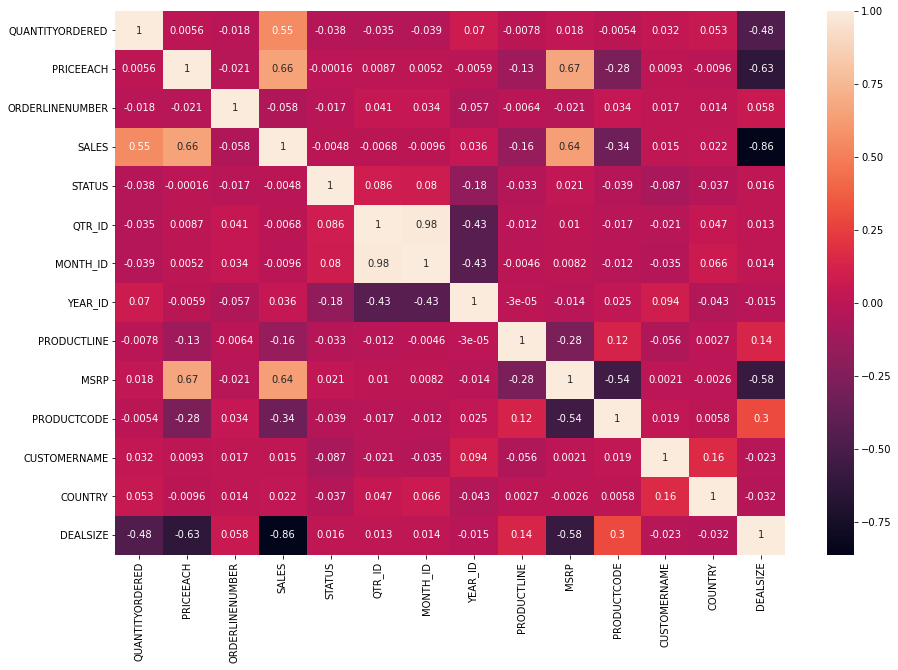

In [10]:
fig, axis = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [11]:
df = df.drop(['ORDERLINENUMBER', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'CUSTOMERNAME', 'COUNTRY'], axis=1)
df

,QUANTITYORDERED,PRICEEACH,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,DEALSIZE
0,30,95.70,2871.00,1,95,0,2
1,34,81.35,2765.90,1,95,0,2
2,41,94.74,3884.34,1,95,0,1
3,45,83.26,3746.70,1,95,0,1
4,49,100.00,5205.27,1,95,0,1
...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,3,54,108,2
2819,29,100.00,3978.51,3,54,108,1
2820,43,100.00,5417.57,3,54,108,1
2821,34,62.24,2116.16,3,54,108,2


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [13]:
#Elbow Method
from sklearn.cluster import KMeans

inertias = []
for k in range(1,15):
    knn = KMeans(n_clusters=k, random_state=0)
    knn.fit(df_scaled)
    inertias.append(knn.inertia_)
    
print(inertias)

[19761.00000000003, 12946.27183603777, 10797.578333133619, 9330.459414713494, 8318.257186184806, 7394.754191697565, 6728.210123789223, 6299.515675814295, 5953.327903570283, 5644.016652200471, 5342.7432039690675, 5081.226008321533, 4839.032497862488, 4664.111825646054]


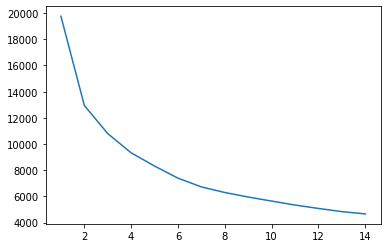

In [14]:
k = list(range(1,15))
plt.plot(k, inertias)

k = 5

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, random_state=0, test_size=0.25)

knn = KMeans(n_clusters=5, random_state=0)
knn.fit(X_train)

KMeans(n_clusters=5, random_state=0)

In [16]:
clusters = knn.predict(X_test)
clusters

array([4, 3, 2, 3, 4, 3, 4, 0, 4, 0, 3, 3, 1, 3, 0, 3, 4, 2, 0, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 3, 2, 4, 0, 3, 2, 0, 2, 0, 2, 3, 0, 4, 3, 3,
       4, 0, 3, 0, 2, 0, 3, 2, 2, 3, 2, 3, 3, 2, 0, 4, 2, 4, 0, 0, 2, 0,
       4, 0, 2, 0, 4, 2, 0, 3, 2, 0, 3, 4, 3, 3, 0, 0, 0, 0, 1, 4, 2, 2,
       4, 0, 0, 0, 0, 3, 3, 2, 3, 2, 0, 1, 0, 1, 3, 4, 4, 0, 2, 3, 2, 3,
       3, 2, 4, 2, 3, 4, 3, 4, 3, 3, 3, 0, 4, 3, 4, 2, 3, 3, 3, 0, 0, 4,
       3, 4, 3, 0, 0, 2, 4, 3, 0, 0, 3, 2, 2, 2, 4, 3, 4, 0, 0, 0, 4, 2,
       3, 0, 0, 3, 1, 4, 3, 1, 0, 3, 3, 0, 0, 2, 0, 3, 4, 2, 1, 0, 3, 4,
       0, 0, 2, 0, 4, 1, 0, 2, 3, 2, 2, 2, 0, 0, 4, 2, 4, 0, 2, 2, 0, 0,
       2, 4, 2, 4, 0, 3, 0, 0, 3, 2, 4, 4, 2, 3, 4, 0, 2, 3, 3, 1, 0, 2,
       0, 3, 3, 0, 2, 3, 3, 2, 3, 3, 0, 4, 0, 0, 2, 0, 0, 2, 3, 2, 4, 0,
       3, 3, 2, 4, 3, 4, 3, 0, 3, 2, 0, 3, 2, 3, 2, 1, 3, 3, 2, 2, 4, 2,
       3, 2, 2, 4, 0, 2, 2, 3, 3, 3, 3, 0, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3,
       2, 2, 0, 3, 1, 3, 0, 3, 2, 3, 2, 3, 4, 3, 3,

In [17]:
X_test['Cluster'] = clusters
X_test['Cluster'].value_counts()

<ipython-input-17-355feb4cca72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Cluster'] = clusters


3    218
0    202
2    150
4    107
1     29
Name: Cluster, dtype: int64

c:\users\shreyder\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\shreyder\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\shreyder\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


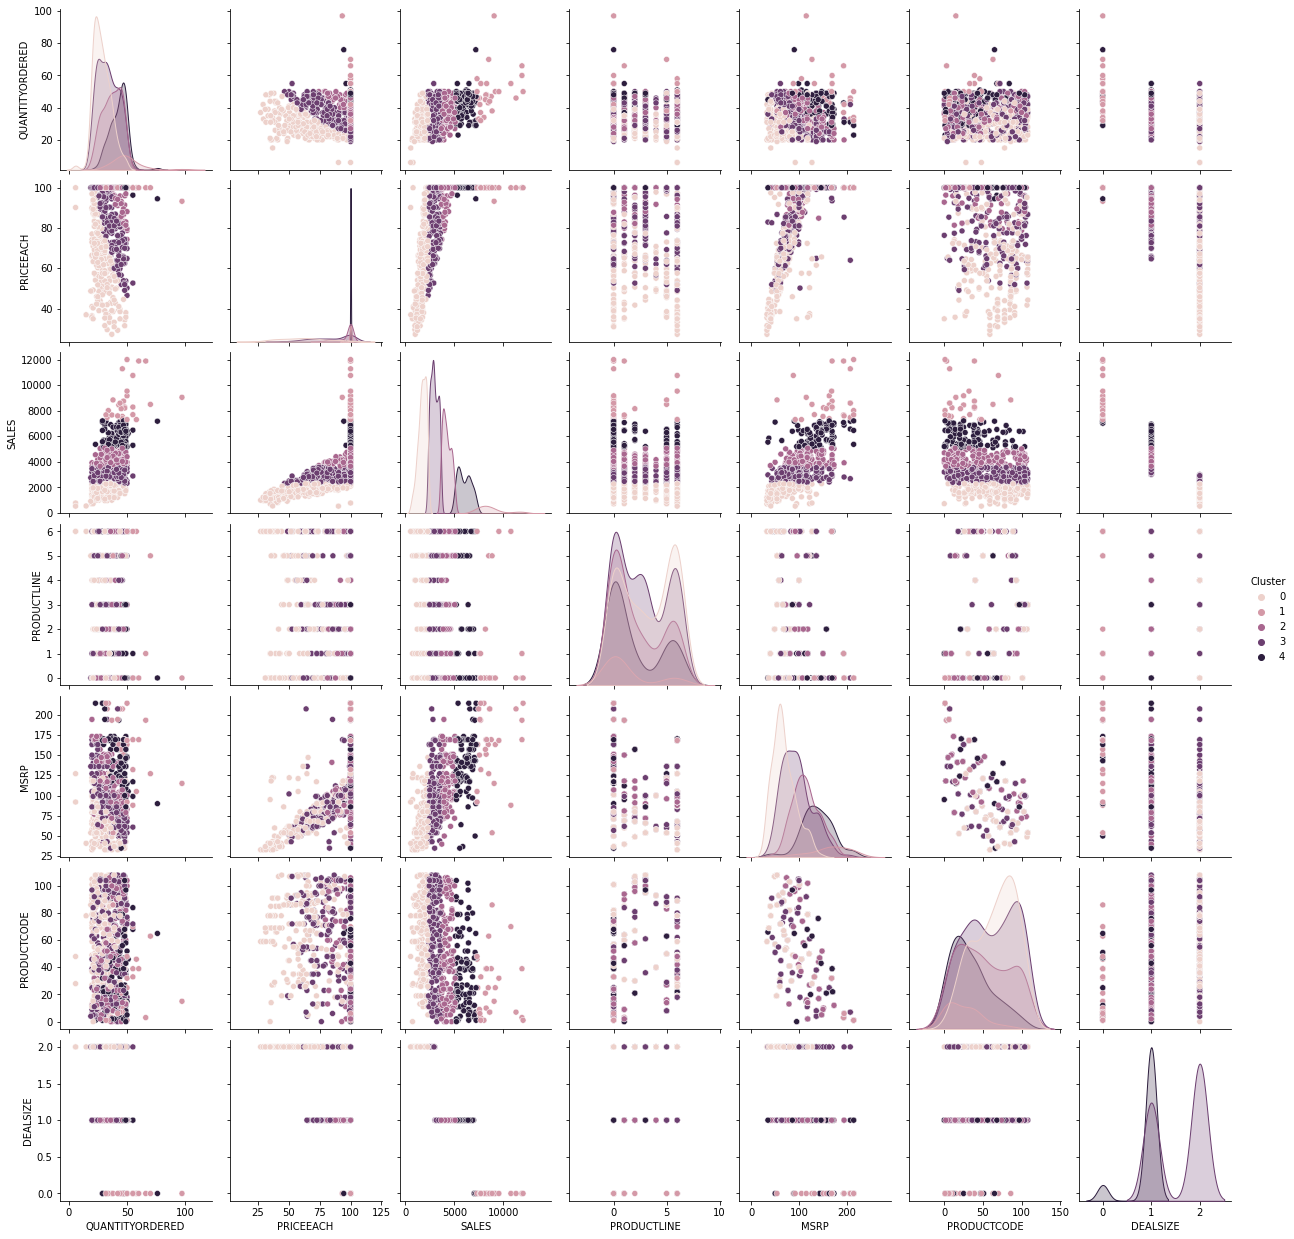

In [18]:
sns.pairplot(X_test, hue='Cluster')

<AxesSubplot:xlabel='PRICEEACH', ylabel='SALES'>

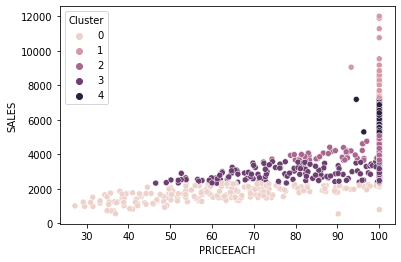

In [19]:
sns.scatterplot(data=X_test, x='PRICEEACH', y='SALES', hue='Cluster')